Importation of the packages to use in the analysis of the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Preprocessing

We start reading and visualising the '.csv' file which contains the data.

In [2]:
df = pd.read_csv('Chocolate Sales.csv')
df

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184
...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,"$4,410",323
1090,Jehu Rudeforth,USA,White Choc,07-Jun-22,"$6,559",119
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,$574,217
1092,Dotty Strutley,India,Eclairs,28-Jul-22,"$2,086",384


Now, let's get more information about the data. For example, if there are any empty entries or duplicated ones.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [4]:
df.duplicated().sum()

0

Once the data is cleaned from any useless entries, it is time to make transformations to the dataset. In this case, the 'Date' and the 'Amount' columns will be transformed.

In [5]:
#Convert 'Date' column type and format 
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
df['Date']

0      2022-01-04
1      2022-08-01
2      2022-07-07
3      2022-04-27
4      2022-02-24
          ...    
1089   2022-05-17
1090   2022-06-07
1091   2022-07-26
1092   2022-07-28
1093   2022-05-23
Name: Date, Length: 1094, dtype: datetime64[ns]

In [6]:
#Transform 'Amount' column type and format, removing characters from it.
df['Amount'] = df['Amount'].str.replace('$', '')
df['Amount'] = df['Amount'].str.replace(',', '')
df['Amount'] = df['Amount'].str.strip()
df['Amount'] = df['Amount'].astype(float)
df['Amount']

0        5320.0
1        7896.0
2        4501.0
3       12726.0
4       13685.0
         ...   
1089     4410.0
1090     6559.0
1091      574.0
1092     2086.0
1093     5075.0
Name: Amount, Length: 1094, dtype: float64

In [7]:
df

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184
...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,2022-05-17,4410.0,323
1090,Jehu Rudeforth,USA,White Choc,2022-06-07,6559.0,119
1091,Ches Bonnell,Canada,Organic Choco Syrup,2022-07-26,574.0,217
1092,Dotty Strutley,India,Eclairs,2022-07-28,2086.0,384


## Data Exploration and Analysis

    DATA VISUALISATION

Let's begin visualising the data in different contexts so that we can achieve a deeper understanding of the different variables and how they are connected.

C:\Users\Tino\AppData\Local\Temp\ipykernel_21272\2184853496.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = country_sales, x = 'Amount', y = 'Country', palette='deep')


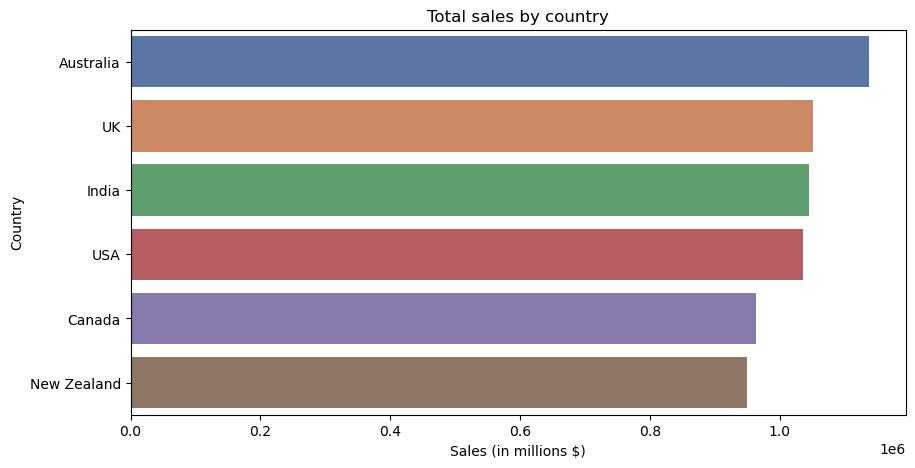

In [8]:
#Visualization of the total sales by country.
country_sales = df.groupby('Country')['Amount'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data = country_sales, x = 'Amount', y = 'Country', palette='deep')
plt.title('Total sales by country')
plt.xlabel('Sales (in millions $)')
plt.ylabel('Country')
plt.show()

The graph above shows the sales of the chocolate company in the countries where it has presence.

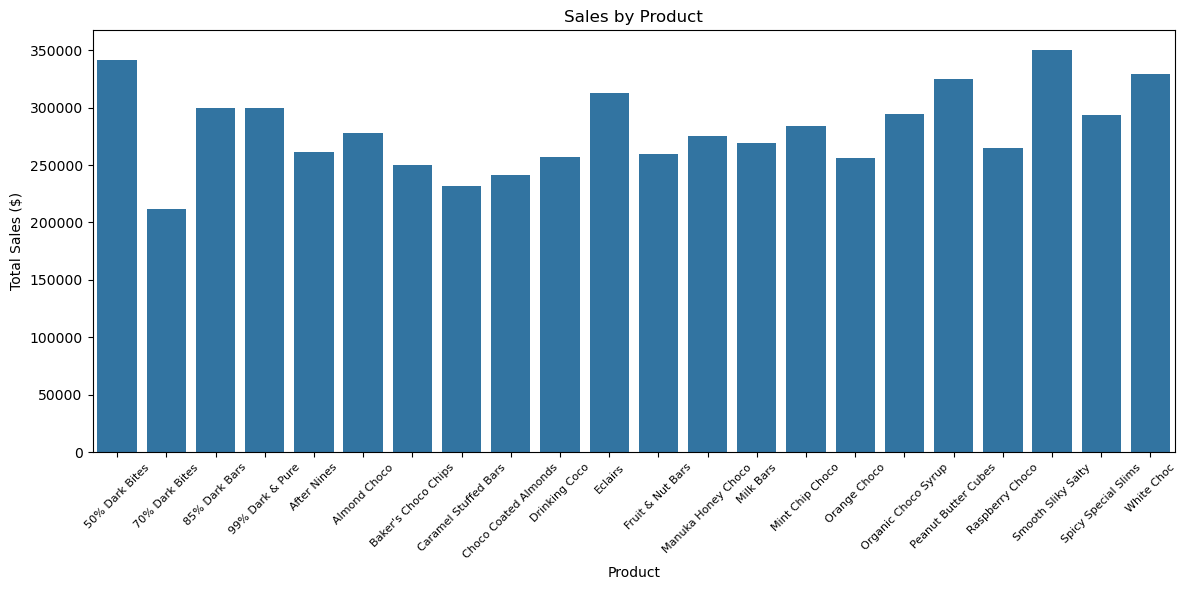

In [9]:
#Total sales of each chocolate product.
product_sales = df.groupby('Product')['Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=product_sales, x='Product', y='Amount')
plt.xlabel("Product")
plt.ylabel("Total Sales ($)")
plt.title("Sales by Product")
plt.xticks(rotation=45, fontsize=8);
plt.tight_layout()
plt.show()

The graph above shows the total sales of each chocolate product. 

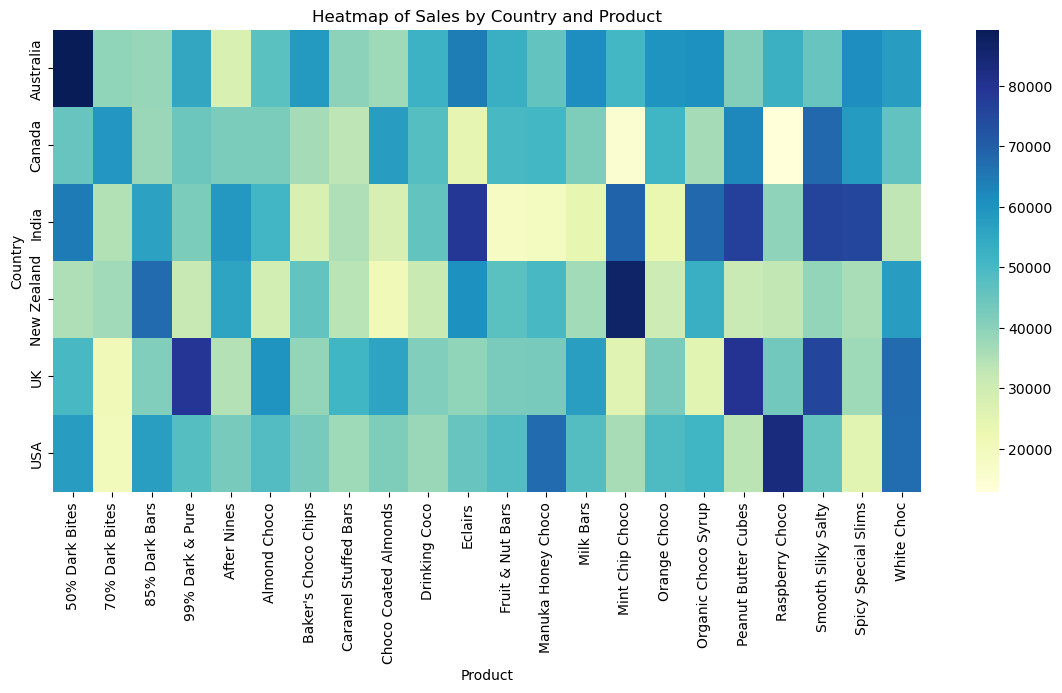

In [10]:
#A heatmap to see the relation between country and product by its sales.
pivot = df.pivot_table(index='Country', columns='Product', values='Amount', aggfunc='sum').fillna(0)

plt.figure(figsize=(14, 6))
sns.heatmap(pivot, annot=False, fmt='.0f', cmap='YlGnBu')
plt.title('Heatmap of Sales by Country and Product')
plt.xlabel('Product')
plt.ylabel('Country')
plt.show()

This heatmap provides more detailed information related to the previous graphs. Here we can get an inside look at what products are selling best in each country. For example, in the first graph we saw that Australia is the best customer, and looking at the heatmap we can see that Australia buys good amounts of almost every product with a peak in sales with the '50% Dark Bites' product, shown in the second graph as one of the best-selling.

C:\Users\Tino\AppData\Local\Temp\ipykernel_21272\588874638.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = employee_sales, x = 'Amount', y = 'Sales Person', palette='coolwarm')


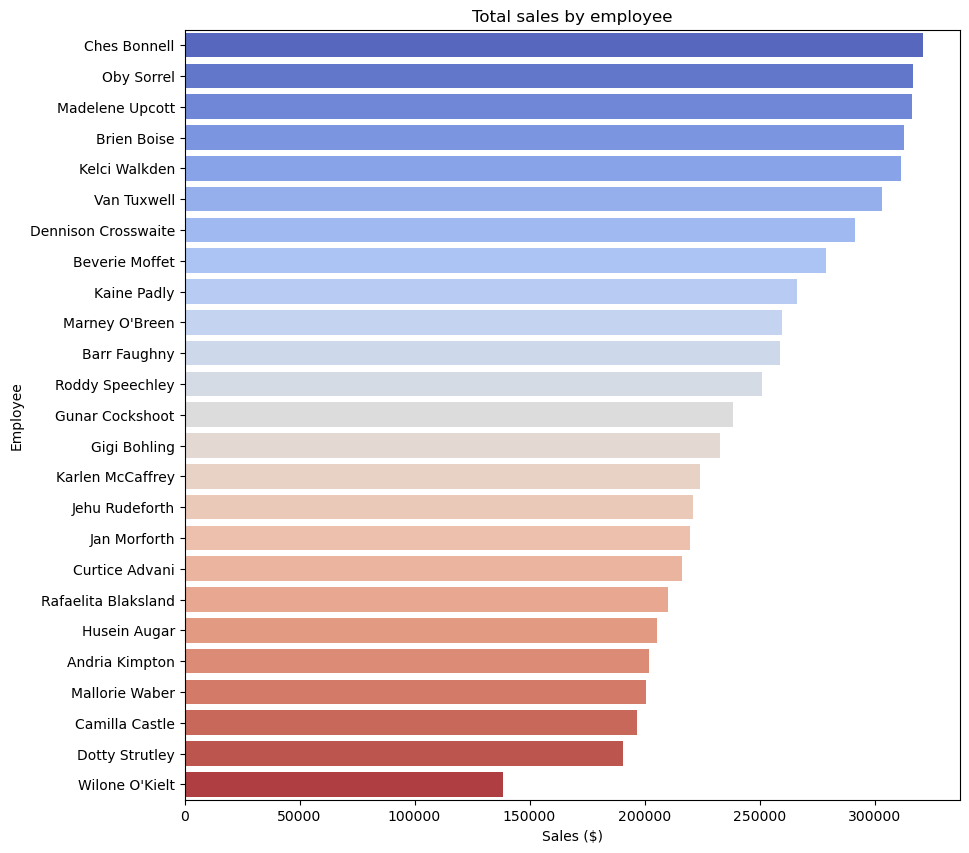

In [11]:
#Visualisation of the sales by employee.
employee_sales = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 10))
sns.barplot(data = employee_sales, x = 'Amount', y = 'Sales Person', palette='coolwarm')
plt.title('Total sales by employee')
plt.xlabel('Sales ($)')
plt.ylabel('Employee')
plt.show()

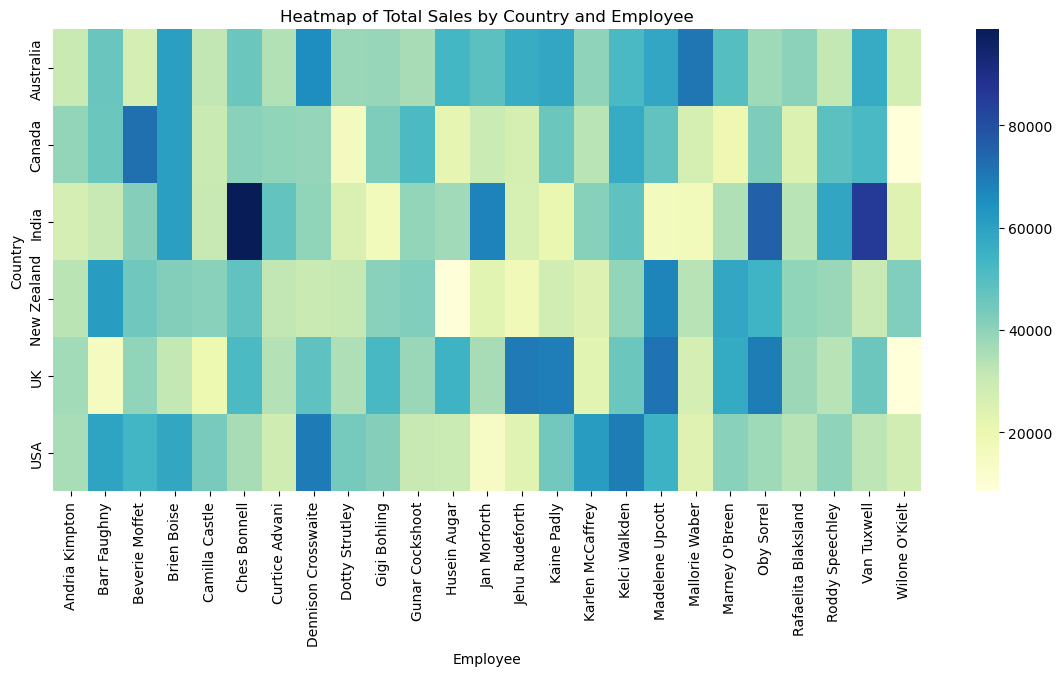

In [12]:
#A heatmap to see the relation between country and seller by their sales.
pivot = df.pivot_table(index='Country', columns='Sales Person', values='Amount', aggfunc='sum').fillna(0)

plt.figure(figsize=(14, 6))
sns.heatmap(pivot, annot=False, fmt='.0f', cmap='YlGnBu')
plt.title('Heatmap of Total Sales by Country and Employee')
plt.xlabel('Employee')
plt.ylabel('Country')
plt.show()

The two graphs above are really useful for any company because they allow us to get an insight into the performance of each employee. From knowing who are the company's best selling people (first graph) to knowing in which markets they perform best (second graph). This could allow a company to plan a strategy accordingly and take the best out of every employee.

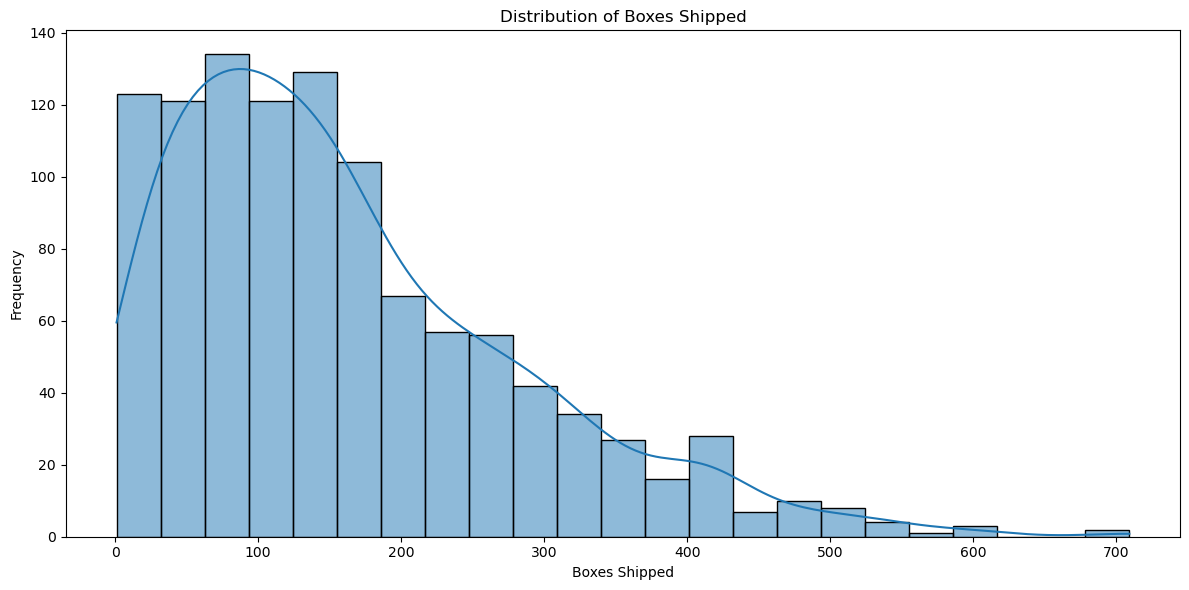

In [13]:
    plt.figure(figsize=(12, 6))
    sns.histplot(df['Boxes Shipped'], kde=True)
    plt.xlabel('Boxes Shipped')
    plt.ylabel('Frequency')
    plt.title('Distribution of Boxes Shipped')
    plt.tight_layout()
    plt.show()

The graph above shows the frequency of total boxes shipped per order by the company. It's clear that orders will usually require between 50 and 150 boxes, rarely receiving orders that exceed 500 boxes. This can help the company plan a campaign to promote and encourage the purchase of larger orders.

C:\Users\Tino\AppData\Local\Temp\ipykernel_21272\3916488466.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='Date', freq='M'))['Amount'].sum().reset_index()


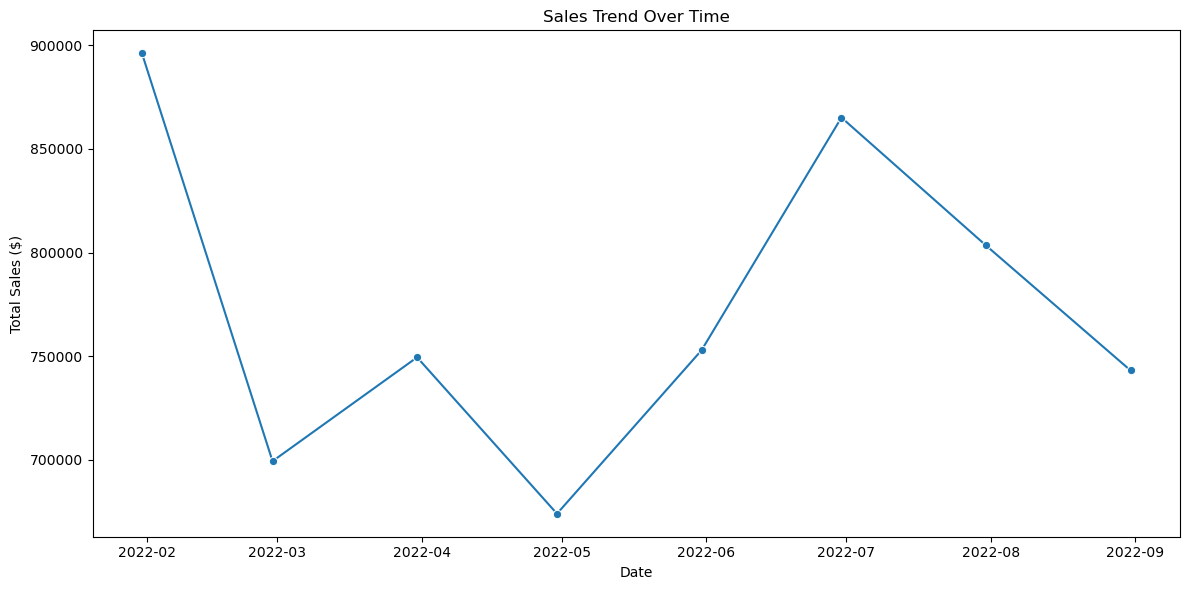

In [14]:
# # Group the data by month and sum the sales amount
monthly_sales = df.groupby(pd.Grouper(key='Date', freq='M'))['Amount'].sum().reset_index()

# Plot the sales trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Date', y='Amount', marker='o')
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.title("Sales Trend Over Time")
plt.tight_layout()
plt.show()

The graph above shows the monthly sales throughout the entire dataset. Since the dataset is small, it's not as useful as a larger one would be, but it can still help us understand how the company is performing. 

    TREND MODELLING

Now that the dataset has been preprocessed and visualised, it's time to use it for forecasting. Different models can be used for forecasting, such as the Lasso model (since there are less than 100k entries and a quantity is the measure to forecast), but in this case the 'Date' and 'Amount' columns will be the only ones to include. The Prophet model is the best option as it takes into account the seasonality and trend factors.

In [1]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

In [16]:
#First let's sort all the daily total sales by date.
daily_sales = df.groupby('Date')['Amount'].sum().reset_index()
daily_sales = daily_sales.sort_values('Date')
#As well, rename the date and amount column to feed the data in the format the model requires.
daily_sales = daily_sales.rename(columns={'Date': 'ds', 'Amount': 'y'})
daily_sales

,ds,y
0,2022-01-03,40425.0
1,2022-01-04,77175.0
2,2022-01-05,29162.0
3,2022-01-07,8666.0
4,2022-01-10,51471.0
...,...,...
163,2022-08-24,43400.0
164,2022-08-25,40341.0
165,2022-08-26,17556.0
166,2022-08-30,23072.0


Now that the data has been adjusted to the model's format, it's time to initialise it, fit the data into the model and make some forecasting.

In [27]:
model = Prophet()
model.fit(daily_sales)
future = model.make_future_dataframe(periods = 60)
forecast = model.predict(future)

13:33:19 - cmdstanpy - INFO - Chain [1] start processing
13:33:19 - cmdstanpy - INFO - Chain [1] done processing


The graph below represents the model (blue line), the data points provided to the model (black dots) and the error from the model (blue shade). Trend and weekly seasonality are also plotted, respectively.

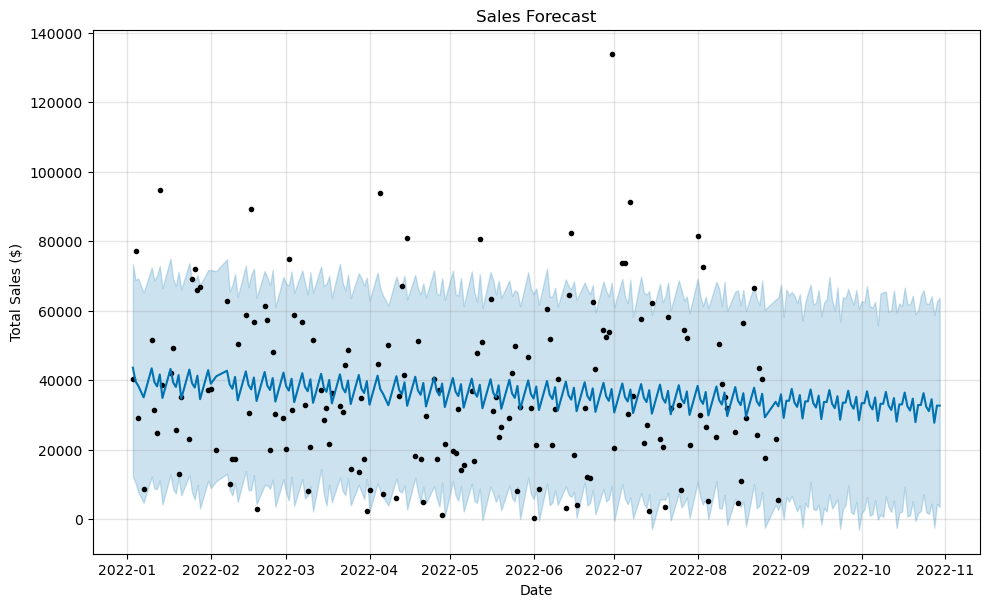

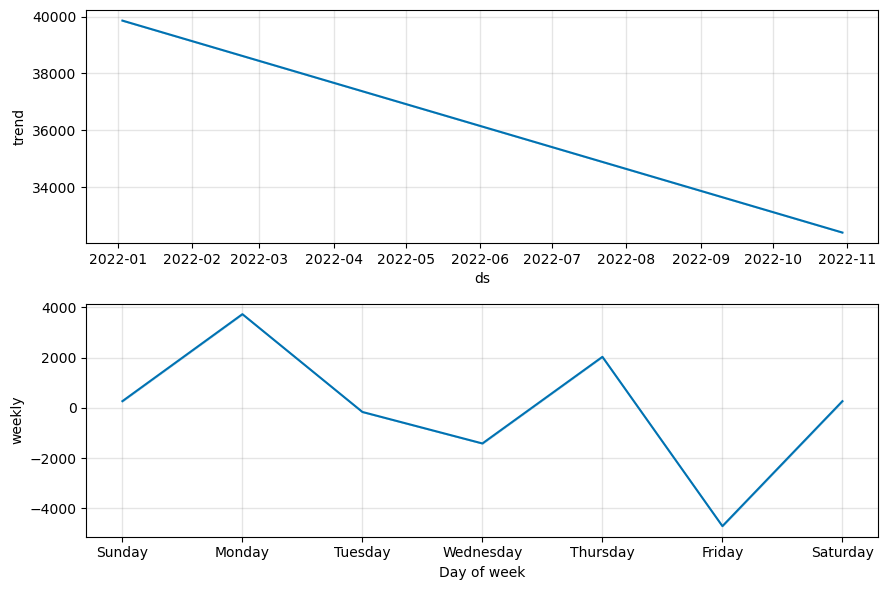

In [28]:
graph1 = model.plot(forecast)
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.show()

# Plot forecast components such as trend and seasonality
graph2 = model.plot_components(forecast)
plt.show()

To be sure that the model is predicting as intended, a cross validation is a useful tool.

In [26]:
df_cv = cross_validation(model, initial='168 days', period='30 days', horizon='60 days')

# Calculate performance metrics for the cross-validated predictions
df_metrics = performance_metrics(df_cv)
df_metrics

  0%|          | 0/1 [00:00<?, ?it/s]

13:32:57 - cmdstanpy - INFO - Chain [1] start processing
13:32:57 - cmdstanpy - INFO - Chain [1] done processing


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,5 days,1.552775e+09,39405.268665,34098.002243,0.439406,0.511770,0.599774,0.25
1,6 days,1.194191e+09,34557.067323,26087.893597,0.354070,0.341099,0.473018,0.50
2,9 days,9.780817e+08,31274.297604,22455.210247,0.326022,0.285003,0.426462,0.75
3,10 days,1.027087e+09,32048.204782,25277.760261,0.463547,0.512194,0.525288,0.75
4,11 days,1.969227e+08,14032.915387,12305.173182,0.361078,0.307255,0.343658,1.00
5,12 days,4.235703e+08,20580.824669,18408.078842,3.465478,0.520436,0.725862,0.75
6,13 days,5.769163e+08,24019.082093,21149.970196,3.502093,0.593665,0.788061,0.50
7,16 days,5.594201e+08,23652.063885,20475.903546,3.464843,0.519165,0.765585,0.50
8,17 days,6.080236e+08,24658.135393,22762.953560,3.590650,0.632097,0.848555,0.50
9,18 days,5.867624e+08,24223.178964,22409.395321,2.564026,0.632097,0.821738,0.75


It is clear that the model is capable of detecting any trend and seasonality from the dataset. However, the small size of the sample (168 entries) does not allow the model to be any more accurate, which explains the RMSE that it returns. If gathering more data was possible, years of data would be ideal. This would help us getting a bigger insight into the relationship between the metrics and a clearer picture of how the future (short, mid and long-term) will likely be.